In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/H A R I H A R A N/Desktop/sem 8/Heart Disease/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


95.08196721311475


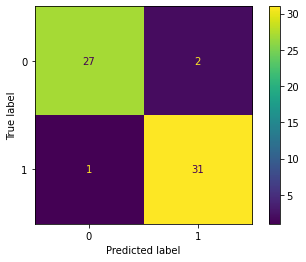

In [69]:
rfdf = df[['thalach', 'oldpeak', 'ca', 'cp', 'exang', 'chol', 'age', 'trestbps', 'slope', 'sex','target']]
Y1 = rfdf['target']
X1 = rfdf.drop(['target'], axis = 1)
for i in range(1,200):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state = i)
    rf_Model = RandomForestClassifier(max_depth=759, max_features='log2', min_samples_leaf=2,criterion ='entropy',
                           n_estimators=200)
    model = rf_Model.fit(X_train1,y_train1)
    print (model.score(X_test1,y_test1)*100)

y_pred1 = model.predict(X_test1)

# Create the confusion matrix
cm = confusion_matrix(y_test1, y_pred1)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

93.44262295081968


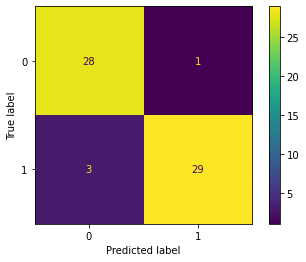

In [74]:
xbgdf =  df[['cp',
 'thal',
 'ca',
 'slope',
 'exang',
 'sex','target']]
Y2 = xbgdf['target']
X2 = xbgdf.drop(['target'], axis = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.20, random_state = 65)
xgb_Model = XGBClassifier( learning_rate =0.1,n_estimators=250 ,max_depth=6, min_child_weight=1, gamma=1, subsample=0.6)
model = xgb_Model.fit(X_train2,y_train2)
print(model.score(X_test2,y_test2)*100)
y_pred2 = model.predict(X_test2)

# Create the confusion matrix
cm = confusion_matrix(y_test2, y_pred2)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

91.80327868852459


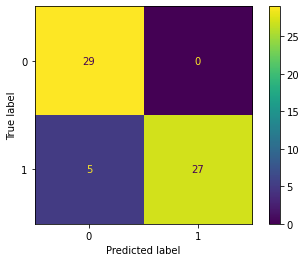

In [77]:

knndf =  df[['sex','cp','fbs','oldpeak','slope','ca','thal','target']]
Y3 = knndf['target']
X3 = knndf.drop(['target'], axis = 1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.20, random_state = 65)
knn_Model = KNeighborsClassifier(n_neighbors=6) 
knn_model = knn_Model.fit(X_train3,y_train3)
print (knn_model.score(X_test3,y_test3)*100)
y_pred3 = knn_model.predict(X_test3)

# Create the confusion matrix
cm = confusion_matrix(y_test3, y_pred3)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [7]:
y_pred1 = [1 ,0 ,0 ,0 ,0 ,1 ,1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
 1, 1, 1, 1, 1, 1, 0, 1 ,0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
y_pred2 = [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
y_pred3 = [1 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0
, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
y_pred4 = [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,0 ,0 ,0 ,0, 0, 1, 1, 1, 1, 0 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,1,
 1, 0, 1, 1, 1, 0, 1, 1 ,1 ,1 ,1, 0, 1, 1, 0, 1, 0,0 ,1 ,1 ,1 ,1 ,0 ,1]
print(y_pred1,y_pred2,y_pred3,y_pred4)

[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0] [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0] [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0] [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]


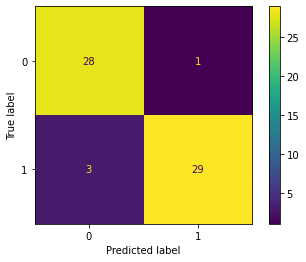

In [14]:
Y = df['target']
X = df.drop(['target'], axis = 1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.20, random_state = 65)

i = 0
res = []
while(i != len(y_pred1)):
    a = []
    a.append(y_pred1[i])
    a.append(y_pred2[i])
    a.append(y_pred3[i])
    a.append(y_pred4[i])
    if a.count(0) > a.count(1):
        res.append(0)
    else:
        res.append(1)
    i+=1
cm = confusion_matrix(y_test3, res)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

0.9344262295081968


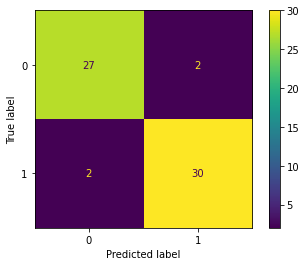

In [61]:
from sklearn.ensemble import VotingClassifier
Y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 65)

clf1 = RandomForestClassifier(max_depth=759, max_features='log2', min_samples_leaf=2,criterion ='entropy',
                       n_estimators=200)
clf2 = XGBClassifier( learning_rate =0.1,n_estimators=250 ,max_depth=6, min_child_weight=1, gamma=1, subsample=0.6)
clf3 = KNeighborsClassifier(n_neighbors=6) 
eclf1 = VotingClassifier(estimators=[('rf', clf1), ('xgb', clf2), ('knn', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(eclf1.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

0.9344262295081968


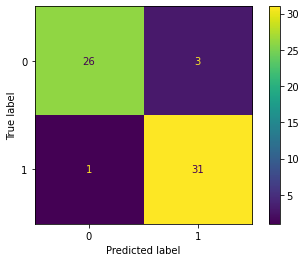

In [15]:
from sklearn.ensemble import VotingClassifier
Y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 65)

clf1 = RandomForestClassifier(max_depth=759, max_features='log2', min_samples_leaf=2,criterion ='entropy',
                           n_estimators=200)
clf2 = XGBClassifier( learning_rate =0.1,n_estimators=250 ,max_depth=6, min_child_weight=1, gamma=1, subsample=0.6)
clf3 = KNeighborsClassifier(n_neighbors=6) 
eclf1 = VotingClassifier(estimators=[('rf', clf1), ('xgb', clf2), ('knn', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(eclf1.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [7]:
rfdf = df[['thalach', 'oldpeak', 'ca', 'cp', 'exang', 'chol', 'age', 'trestbps', 'slope', 'sex','target']]
Y1 = rfdf['target']
X1 = rfdf.drop(['target'], axis = 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state = 65)

In [24]:
a = list(y_test1)
y_pred1 = [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
print(a)
cm = confusion_matrix(y_test1, y_pred1)

[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]


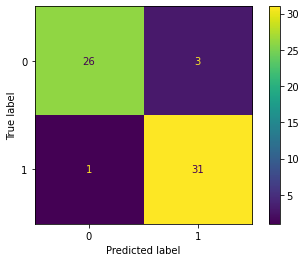

In [25]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [35]:
y_pred2 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]
y_pred3 = [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]

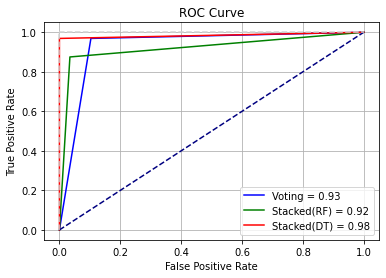

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# calculate false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
fpr1, tpr1, thresholds = roc_curve(y_test1, y_pred2)
fpr2, tpr2, thresholds = roc_curve(y_test1, y_pred3)



# calculate AUC
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)


# plot ROC curve
plt.plot(fpr, tpr, color='blue',linestyle='-' ,label=f'Voting = {roc_auc:.2f}')
plt.plot(fpr1, tpr1, color='green',linestyle='-' ,label=f'Stacked(RF) = {roc_auc1:.2f}')
plt.plot(fpr2, tpr2, color='red',linestyle='-' ,label=f'Stacked(DT) = {roc_auc2:.2f}')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 1], color='lightgray', linestyle='--') # 100% line on x-axis
plt.plot([0, 0], [0, 1], color='lightgray', linestyle='--') # 100% line on y-axis

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True) 
plt.show()